In [1]:
% matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
import pandas as pd
import numpy as np
import datetime as dt
from ipykernel import kernelapp as app

In [ ]:
# dt.datetime.strptime()

In [ ]:
# !pwd

In [4]:

weatherpath = '/Users/hrm/Documents/Dropbox/DSrelated/Metis/climate_related/WeatherData/'
weatherfile = 'DS3505 - Surface Data Hourly Global Newark dat.txt'

In [5]:
# weatherpath+weatherfile

'/Users/hrm/Documents/Dropbox/DSrelated/Metis/climate_related/WeatherData/DS3505 - Surface Data Hourly Global Newark dat.txt'

In [6]:
tmp = pd.read_csv(weatherpath+weatherfile,delim_whitespace=True, na_values=['**','***','****','*****'])

In [7]:
tmp.columns

Index(['USAF', 'WBAN', 'YR--MODAHRMN', 'DIR', 'SPD', 'GUS', 'CLG', 'SKC', 'L',
       'M', 'H', 'VSB', 'MW', 'MW.1', 'MW.2', 'MW.3', 'AW', 'AW.1', 'AW.2',
       'AW.3', 'W', 'TEMP', 'DEWP', 'SLP', 'ALT', 'STP', 'MAX', 'MIN', 'PCP01',
       'PCP06', 'PCP24', 'PCPXX', 'SD'],
      dtype='object')

In [8]:
tmp['YR--MODAHRMN'].head()

0    200401010000
1    200401010051
2    200401010151
3    200401010251
4    200401010351
Name: YR--MODAHRMN, dtype: int64

In [9]:
fmt = '%Y%m%d%H%M%S' # %Z'

In [ ]:
# dt.datetime.strptime(tmp['YR--MODAHRMN'][0].astype(str),fmt) #datetime.datetime(2004, 1, 1, 0, 0)

In [ ]:
# dt.datetime.strptime(tmp['YR--MODAHRMN'][0].astype(str),fmt).year #2004

In [210]:
# test = pd.DataFrame([dt.datetime.strptime(d,fmt) for d in tmp['YR--MODAHRMN'].astype(str)], columns=['datetime'])
tmp['Date'] = pd.DataFrame([dt.datetime.strptime(d,fmt).date() for d in tmp['YR--MODAHRMN'].astype(str)] )

In [10]:
tmp['YR'] = pd.DataFrame([dt.datetime.strptime(d,fmt).year for d in tmp['YR--MODAHRMN'].astype(str)] ).astype(int)

In [11]:
tmp['MTH'] = pd.DataFrame([dt.datetime.strptime(d,fmt).month for d in tmp['YR--MODAHRMN'].astype(str)] ).astype(int)

In [12]:
tmp['DAY'] = pd.DataFrame([dt.datetime.strptime(d,fmt).day for d in tmp['YR--MODAHRMN'].astype(str)] ).astype(int)

In [ ]:
# tmp['HR'] = pd.DataFrame([dt.datetime.strptime(d,fmt).hour for d in tmp['YR--MODAHRMN'].astype(str)] )

In [ ]:
# tmp['MIN'] = pd.DataFrame([dt.datetime.strptime(d,fmt).min for d in tmp['YR--MODAHRMN'].astype(str)] )

In [13]:
def Farenheit2Celsius(F):
    #Ctemp = (Ftemp - 32) * 5/9
    return (F - 32) * 5/9

In [ ]:
# Farenheit2Celsius(25)

In [14]:
tmp['TEMPc'] = Farenheit2Celsius(tmp['TEMP'])
tmp['DEWPc'] = Farenheit2Celsius(tmp['DEWP'])

In [15]:
# MARK G. LAWRENCE 2005 AMS
def RelativeHumidity(Tc, Td):
    #RH = 100 - 5*(Tc-Td)
    return 100 - 5*(Tc-Td)

In [17]:
tmp['RelHUM'] = RelativeHumidity(tmp.TEMPc,tmp.DEWPc)

In [228]:
tmp#.head()

,USAF,WBAN,YR--MODAHRMN,DIR,SPD,GUS,CLG,SKC,L,M,...,PCP24,PCPXX,SD,YR,MTH,DAY,TEMPc,DEWPc,RelHUM,Date
0,725020,14734,200401010000,220.0,16.0,NaN,722.0,CLR,0,0,...,NaN,NaN,0.0,2004,1,1,5.555556,-3.888889,52.777778,2004-01-01
1,725020,14734,200401010051,230.0,15.0,22.0,722.0,CLR,*,*,...,NaN,NaN,0.0,2004,1,1,5.555556,-4.444444,50.000000,2004-01-01
2,725020,14734,200401010151,230.0,18.0,NaN,722.0,CLR,*,*,...,NaN,NaN,0.0,2004,1,1,5.000000,-4.444444,52.777778,2004-01-01
3,725020,14734,200401010251,230.0,13.0,NaN,722.0,CLR,*,*,...,NaN,NaN,0.0,2004,1,1,4.444444,-3.888889,58.333333,2004-01-01
4,725020,14734,200401010351,240.0,13.0,NaN,722.0,CLR,*,*,...,NaN,NaN,0.0,2004,1,1,3.333333,-3.888889,63.888889,2004-01-01
5,725020,14734,200401010451,250.0,13.0,NaN,722.0,CLR,*,*,...,NaN,NaN,0.0,2004,1,1,3.888889,-4.444444,58.333333,2004-01-01
6,725020,14734,200401010551,240.0,10.0,NaN,722.0,SCT,*,*,...,NaN,NaN,0.0,2004,1,1,2.777778,-3.888889,66.666667,2004-01-01
7,725020,14734,200401010600,240.0,10.0,NaN,722.0,SCT,*,*,...,NaN,NaN,0.0,2004,1,1,3.333333,-3.888889,63.888889,2004-01-01
8,725020,14734,200401010651,270.0,8.0,NaN,722.0,SCT,*,*,...,NaN,NaN,0.0,2004,1,1,3.333333,-3.888889,63.888889,2004-01-01
9,725020,14734,200401010751,260.0,9.0,NaN,722.0,SCT,*,*,...,NaN,NaN,0.0,2004,1,1,2.777778,-3.888889,66.666667,2004-01-01


In [212]:
tmp['DIR'] = tmp2.DIR.fillna(0)
tmp['SPD'] = tmp2.SPD.fillna(0)
tmp['SD'] = tmp2.SD.fillna(0)

In [215]:
tmp2 = tmp[['Date','YR','MTH','DAY','DIR','SPD','TEMPc','DEWPc','RelHUM','SD',]] #'PCP01']]#.groupby(by=['DAY']).sum() 

In [214]:
tmp2.head()

,Date,YR,MTH,DAY,DIR,SPD,TEMPc,DEWPc,RelHUM,SD
0,2004-01-01,2004,1,1,220.0,16.0,5.555556,-3.888889,52.777778,0.0
1,2004-01-01,2004,1,1,230.0,15.0,5.555556,-4.444444,50.000000,0.0
2,2004-01-01,2004,1,1,230.0,18.0,5.000000,-4.444444,52.777778,0.0
3,2004-01-01,2004,1,1,230.0,13.0,4.444444,-3.888889,58.333333,0.0
4,2004-01-01,2004,1,1,240.0,13.0,3.333333,-3.888889,63.888889,0.0


In [216]:
tmp3 = tmp2.dropna()
tmp3.columns


Index(['Date', 'YR', 'MTH', 'DAY', 'DIR', 'SPD', 'TEMPc', 'DEWPc', 'RelHUM',
       'SD'],
      dtype='object')

In [217]:
tmp4 = tmp3.groupby(by=['Date','YR','MTH','DAY'], as_index=False).mean()#.reset_index() #.plot(x='DAY',y='RelHUM')
tmp4.columns

Index(['Date', 'YR', 'MTH', 'DAY', 'DIR', 'SPD', 'TEMPc', 'DEWPc', 'RelHUM',
       'SD'],
      dtype='object')

In [233]:
# tmp4.MTH.value_counts()
# tmp4.shape
WeatherD = tmp4.iloc[:4018,:]
WeatherD.to_csv(weatherpath+'DS3505_SurfaceDailyData_Newark2004-2014.csv')

In [232]:
WeatherD.head()

,Date,YR,MTH,DAY,DIR,SPD,TEMPc,DEWPc,RelHUM,SD
0,2004-01-01,2004,1,1,285.714286,11.071429,4.662698,-5.416667,49.603175,0.0
1,2004-01-02,2004,1,2,130.000000,4.074074,5.679012,-1.399177,64.609053,0.0
2,2004-01-03,2004,1,3,139.655172,4.517241,8.390805,5.229885,84.195402,0.0
3,2004-01-04,2004,1,4,138.928571,6.785714,9.761905,7.440476,88.392857,0.0
4,2004-01-05,2004,1,5,47.037037,10.222222,3.477366,2.366255,94.444444,0.0


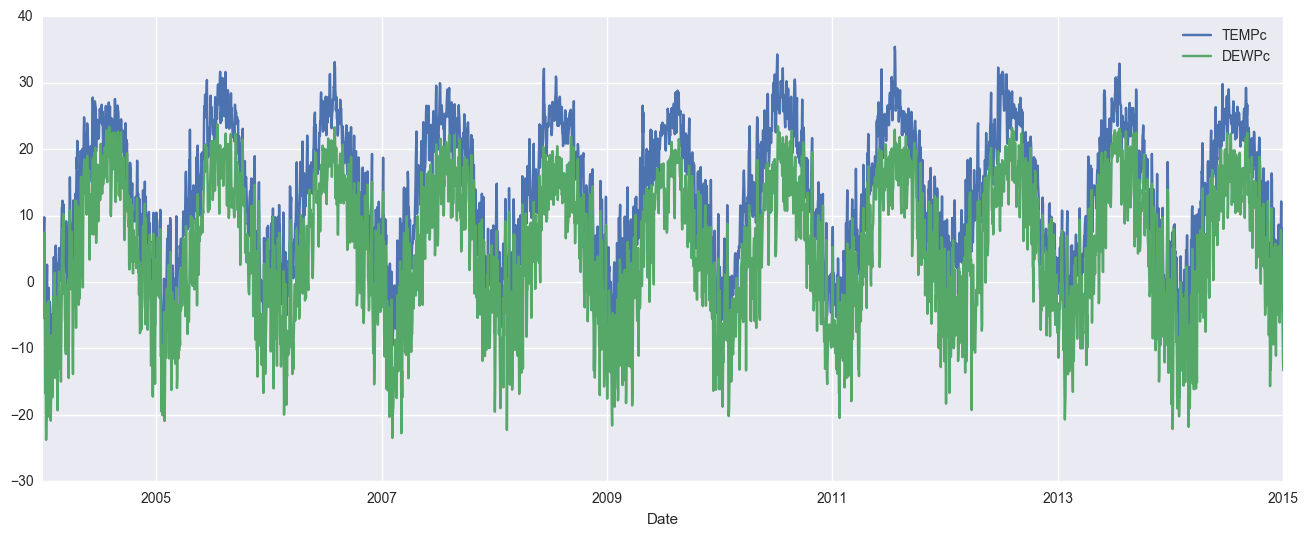

In [223]:
tmp4.plot(y=['TEMPc','DEWPc'], x='Date',  figsize=[16,6]); #x=tmp4.YR.astype(str),

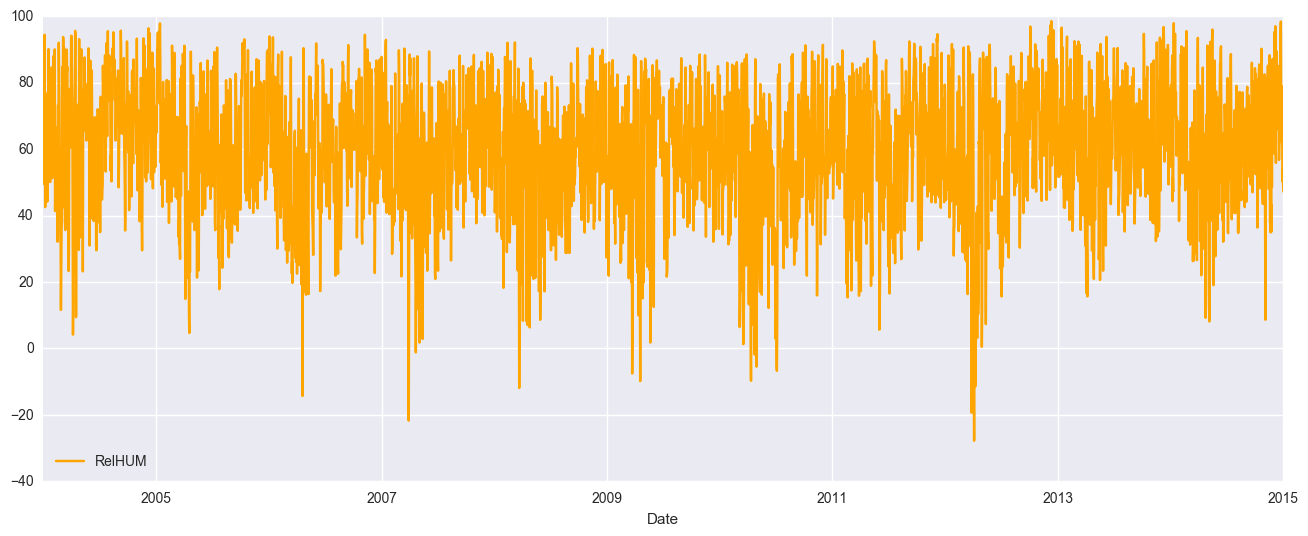

In [225]:
tmp4.plot(y=['RelHUM'], x='Date', figsize=[16,6], color='orange');

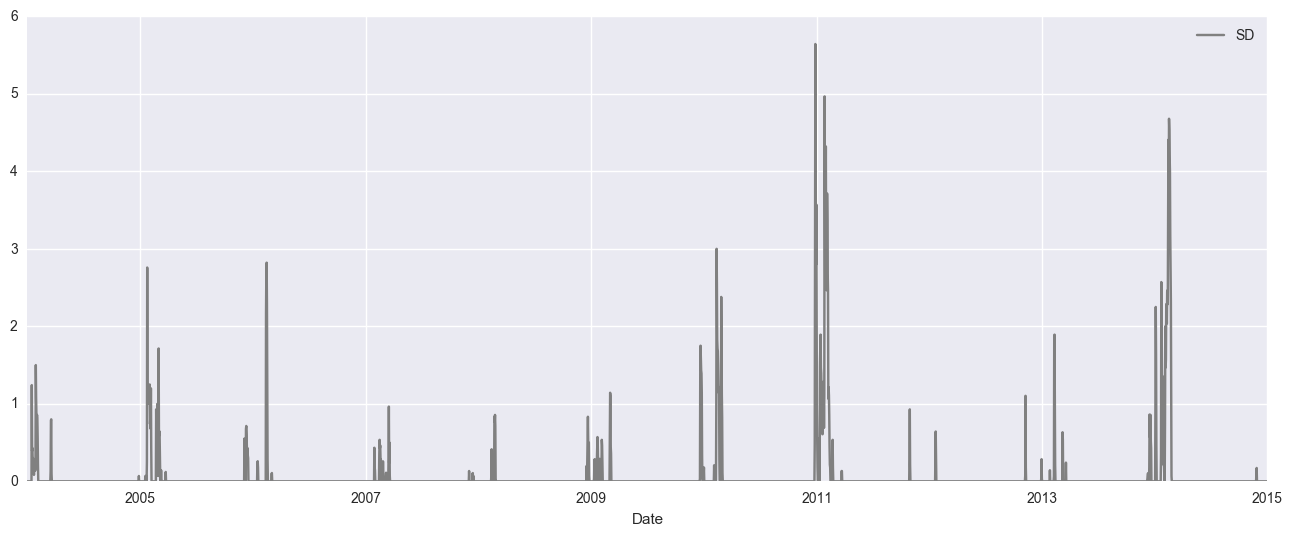

In [226]:
tmp4.plot(y=['SD'], x= 'Date', figsize=[16,6], color='gray');

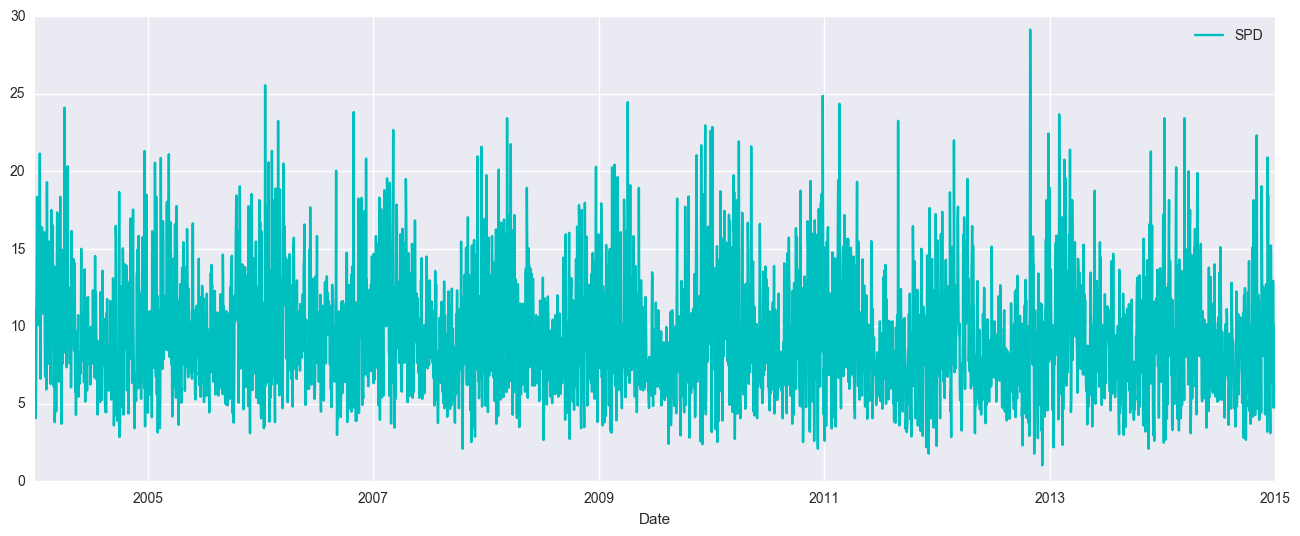

In [227]:
tmp4.plot(y=['SPD'], x= 'Date', figsize=[16,6], color='c');

In [88]:
# tmp4.plot(y=['DIR'], x= tmp4.YR.astype(str), figsize=[16,6]);

In [159]:
# [tmp4.DIR[:10], tmp4.SPD[:10] ]

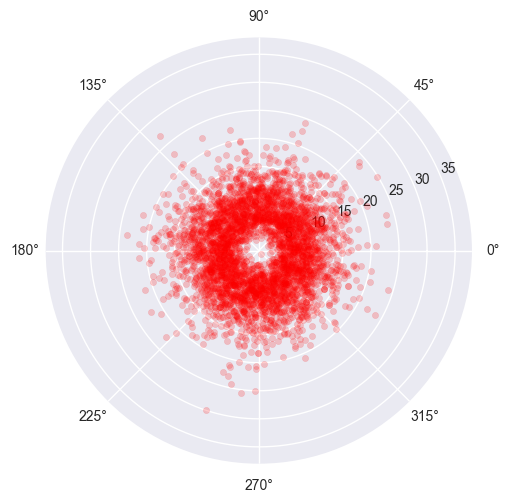

In [172]:
ax = plt.subplot(111, polar=True)
ax.scatter(tmp4.DIR,tmp4.SPD,  color='r', marker='o', alpha=0.2)
# ax.set_rmax(2.0)
ax.grid(True)

# ax.set_title("A line plot on a polar axis", va='bottom')
plt.show()

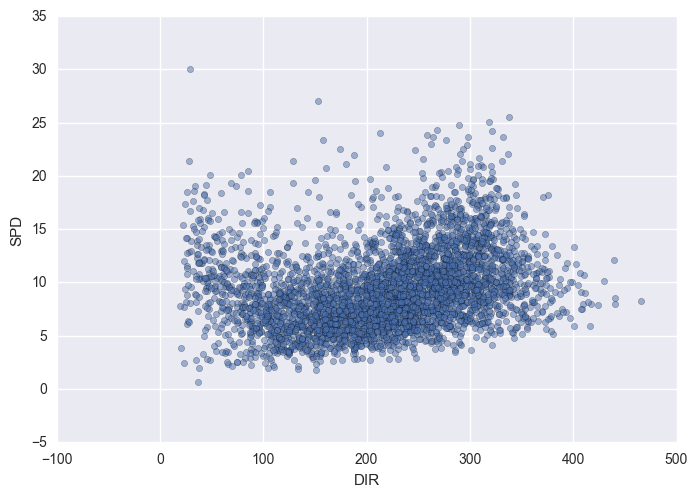

In [173]:
tmp4[['SPD','DIR']].plot.scatter(x='DIR',y='SPD',alpha=0.5);